# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

cld = []
cty = []
dte = []
hum = []
log = []
lat = []
mxs = []
win = []
city_name = []
num = 0
set_data = 1

print(f"Beginning Data Retrieval")

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        num += 1
        print(f"Processing Record {num} of Set {set_data} | {city}")
        city_name.append(response["name"])
        cld.append(response["clouds"]["all"])
        cty.append(response["sys"]["country"])
        dte.append(response["dt"])
        hum.append(response["main"]["humidity"])
        log.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxs.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"]) 
 
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        pass
    if num == 50: 
        set_data += 1
        num = 0

Beginning Data Retrieval
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | pennagaram
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | kabompo
Processing Record 9 of Set 1 | dalinghe
Missing field/result... skipping.
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | sandwick
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | rurrenabaque
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | tocopilla
Processing Record 16 of Set 1 | ixtapa
Processing Record 17 of Set 1 | celestun
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | vaitupu
Missing field/result... skipping.
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | nelson bay

Processing Record 29 of Set 4 | chegutu
Processing Record 30 of Set 4 | dvurechensk
Processing Record 31 of Set 4 | birao
Processing Record 32 of Set 4 | beidao
Processing Record 33 of Set 4 | tuy hoa
Processing Record 34 of Set 4 | gogrial
Processing Record 35 of Set 4 | port alfred
Processing Record 36 of Set 4 | mar del plata
Processing Record 37 of Set 4 | ayan
Processing Record 38 of Set 4 | jurado
Processing Record 39 of Set 4 | saint-pierre
Processing Record 40 of Set 4 | ndele
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | amderma
Missing field/result... skipping.
Processing Record 43 of Set 4 | sao felix do xingu
Processing Record 44 of Set 4 | alugan
Processing Record 45 of Set 4 | viligili
Missing field/result... skipping.
Processing Record 46 of Set 4 | filadelfia
Processing Record 47 of Set 4 | satitoa
Missing field/result... skipping.
Processing Record 48 of Set 4 | aberdeen
Processing Record 49 of Set 4 | erdenet
Processing Record 50 of Set 4 | ye

Processing Record 16 of Set 8 | juegang
Processing Record 17 of Set 8 | patiya
Processing Record 18 of Set 8 | naze
Processing Record 19 of Set 8 | namatanai
Processing Record 20 of Set 8 | waycross
Processing Record 21 of Set 8 | vallee-jonction
Missing field/result... skipping.
Processing Record 22 of Set 8 | karratha
Processing Record 23 of Set 8 | rocha
Processing Record 24 of Set 8 | biltine
Processing Record 25 of Set 8 | hachinohe
Processing Record 26 of Set 8 | puerto escondido
Processing Record 27 of Set 8 | poronaysk
Processing Record 28 of Set 8 | roebourne
Processing Record 29 of Set 8 | half moon bay
Processing Record 30 of Set 8 | chalons-en-champagne
Processing Record 31 of Set 8 | kidal
Processing Record 32 of Set 8 | isangel
Processing Record 33 of Set 8 | killybegs
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | roald
Processing Record 36 of Set 8 | beloha
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | sa

Processing Record 1 of Set 12 | trat
Processing Record 2 of Set 12 | sao joao da barra
Processing Record 3 of Set 12 | bollnas
Processing Record 4 of Set 12 | lazarev
Processing Record 5 of Set 12 | klaksvik
Processing Record 6 of Set 12 | gorontalo
Processing Record 7 of Set 12 | natchitoches
Processing Record 8 of Set 12 | muncie
Processing Record 9 of Set 12 | vestmannaeyjar
Processing Record 10 of Set 12 | campo verde
Processing Record 11 of Set 12 | merauke
Processing Record 12 of Set 12 | port blair
Processing Record 13 of Set 12 | peniche
Processing Record 14 of Set 12 | moche
Processing Record 15 of Set 12 | mattru
Processing Record 16 of Set 12 | shache
Processing Record 17 of Set 12 | hoquiam
Processing Record 18 of Set 12 | semey
Processing Record 19 of Set 12 | ouro preto do oeste
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | abha
Processing Record 22 of Set 12 | beaverlodge
Processing Record 23 of Set 12 | khatanga
Processing Record 24 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#Display the DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Latitude": lat,
                        "Longitude": log,
                        "Max Temp": mxs,
                        "Humidity": hum,
                        "Cloudiness": cld,
                        "Wind Speed": win,
                        "Country": cty,
                        "Date": dte})
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,61.00,71,75,4.70,CA,1594401048
1,Carnarvon,-24.87,113.63,57.20,47,0,8.05,AU,1594400836
2,Pennāgaram,12.13,77.90,76.14,83,79,2.19,IN,1594401049
3,Hilo,19.73,-155.09,73.40,83,75,4.70,US,1594400794
4,Port Elizabeth,-33.92,25.57,59.00,87,79,4.70,ZA,1594401050


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# NOTE: No cities over 100% humidity (skipping)
city_df.max()["Humidity"]

100

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


In [28]:
#Export ther city data into a .csv
city_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)
city_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,61.00,71,75,4.70,CA,1594401048
1,Carnarvon,-24.87,113.63,57.20,47,0,8.05,AU,1594400836
2,Pennāgaram,12.13,77.90,76.14,83,79,2.19,IN,1594401049
3,Hilo,19.73,-155.09,73.40,83,75,4.70,US,1594400794
4,Port Elizabeth,-33.92,25.57,59.00,87,79,4.70,ZA,1594401050


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
#plt.savefig("../Images/IceCreamSales.png")
# plt.show()

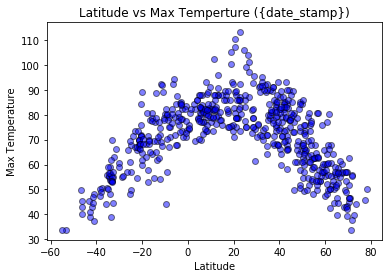

In [38]:

# time = time.gmtime(city_df["Date"][8])
# date_stamp = time.strftime("%x", time)

plt.scatter(city_df["Latitude"],city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperture ({date_stamp})")
plt.savefig("../output_data//fig1.png")
plt.show()

## Latitude vs. Humidity Plot

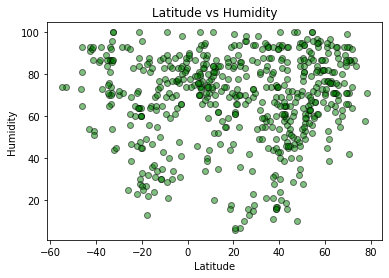

In [39]:
plt.scatter(city_df["Latitude"],city_df["Humidity"], marker="o", facecolors="green", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data//fig2.png")
plt.show()


## Latitude vs. Cloudiness Plot

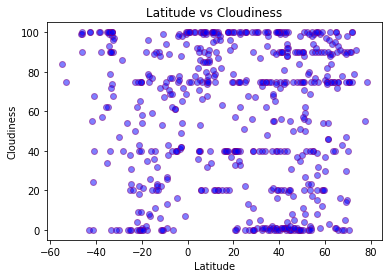

In [40]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="purple",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.savefig("../output_data//fig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

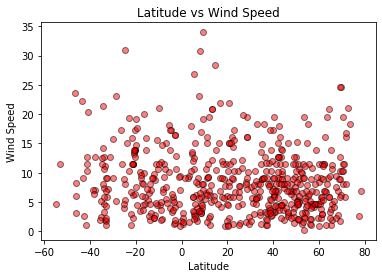

In [41]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig("../output_data//fig4.png")
plt.show()


## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots

In [43]:
# Create Northern and Southern Hemisphere DataFrames

In [44]:
nothern = city_df.loc[cities["Lat"] >= 0]
nothern.reset_index(inplace=True)

southern = city_df.loc[cities["Lat"] < 0]
southern.reset_index(inplace=True)

TypeError: list indices must be integers or slices, not str

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression